In [217]:
from regression import add_neighborhood_feature, avg_loss, SGD, sigmoid
import numpy as np
import matplotlib.pyplot as plt
import random
#import diagram
from matplotlib.colors import ListedColormap, BoundaryNorm

In [218]:
# class diagram:
#     def __init__(self, data):
#         self.data = data #this will be a 20x20 matrix

#     @classmethod
#     def createDiagram(cls):
#         dgrm = cls(np.zeros((20,20), dtype=float))
#         return dgrm
    
#     def layWires(self):
#         possibleRows = [i for i in range(self.data.shape[0])] 
#         possibleColumns = [i for i in range(self.data.shape[1])]

#         colors = [1,2,3,4] #1 is red, 2 is blue, 3 is yellow, 4 is green
#         layRowFirst = random.randrange(2) #0 indicates false, 1 indicates true
#         dangerous = 0 #boolean to keep track of whether the diagram is dangerous. #0 means not dangerous, 1 meeans it is dangerous
#         thirdWireLaid = 0 #this will hold the color of the 3rd wire laid down
#         for i in range(4):
#             color = colors.pop(random.randrange(len(colors)))
            
#             #if the wire to be laid is yellow and the red wire is already laid, mark diagram as dangerous
#             if color == 3 and (1 not in colors): dangerous = 1
            
#             if i==2: thirdWireLaid = color
#             if i%2 == 0:
#                 if layRowFirst == 1:
#                     row = possibleRows.pop(random.randrange(len(possibleRows)))
#                     for j in range(self.data.shape[0]): self.data[row][j] = color
#                 else:
#                     col = possibleColumns.pop(random.randrange(len(possibleColumns)))
#                     for j in range(self.data.shape[1]): self.data[j][col] = color
#             else:
#                 if layRowFirst == 1:
#                     col = possibleColumns.pop(random.randrange(len(possibleColumns)))
#                     for j in range(self.data.shape[1]): self.data[j][col] = color
#                 else:
#                     row = possibleRows.pop(random.randrange(len(possibleRows)))
#                     for j in range(self.data.shape[0]): self.data[row][j] = color
        
#         return (dangerous,0) if dangerous == 0 else (dangerous,thirdWireLaid)

In [219]:
# #code to generate data
# def makeTask1Sets(N, dest):
#     matrices = []
#     labels = []
#     for _ in range(int(N)):
#         dgrm = diagram.createDiagram()
#         danger = np.array(dgrm.layWires())
#         matrices.append(dgrm.data.flatten())
#         labels.append(danger)
#     matrices = np.array(matrices)
#     labels = np.array(labels)

#     # In case the necessary directory hasn't been made yet
#     #os.makedirs(dest, exist_ok=True)
#     np.save(arr=matrices,file=f'{dest}/data.npy',allow_pickle=True)
#     np.save(arr=labels,file=f'{dest}/labels.npy',allow_pickle=True)

# def makeTask2Sets(N, dest):
#     matrices = []
#     labels = []

#     count=0
#     while(count<int(N)):
#         dgrm = diagram.createDiagram()
#         wireToCut = np.array((dgrm.layWires())[1])
#         #print(f"my wire to cut: {wireToCut}")
#         if not np.array_equal(wireToCut,(0,0,0,0,1)):
#             matrices.append(dgrm.data.flatten())
#             labels.append(wireToCut)
#             count+=1

#     matrices = np.array(matrices)
#     labels = np.array(labels)

#     # In case the necessary directory hasn't been made yet
#     #os.makedirs(dest, exist_ok=True)
#     np.save(arr=matrices,file=f'{dest}/data.npy',allow_pickle=True)
#     np.save(arr=labels,file=f'{dest}/labels.npy',allow_pickle=True)

# makeTask2Sets(1000,"OHE_Task2_Testset1000")

In [220]:
"""Load in data: 
    Input Space: (1200, 1) one hot encoded data """

x = np.load('OHE_Task2_Trainset2000\data.npy')[0]
y = np.load('OHE_Task2_Trainset2000\labels.npy')
# w1 = np.random.rand(2000)*2 - np.ones(shape=2000)
# w2 = np.random.rand(2000)*2 - np.ones(shape=2000)
# w3 = np.random.rand(2000)*2 - np.ones(shape=2000)
# w4 = np.random.rand(2000)*2 - np.ones(shape=2000)
# w5 = np.random.rand(2000)*2 - np.ones(shape=2000)
w1 = np.zeros(2000)
w2 = np.zeros(2000)
w3 = np.zeros(2000)
w4 = np.zeros(2000)
w5 = np.zeros(2000)

weights = np.vstack((w1,w2,w3,w4,w5))


In [221]:
"""Multi-Class Classification Model 
    SoftMax --> computes probabilites for each class totals to 1
    Loss Function --> categorical cross entropy --> for all classes -log(softmax(y'))
    Deriviate of Loss --> y' - y_actual"""

def softmax(output_x=list): # output x takes 4 diff values for each weight layer
    exp_output = np.exp(output_x - np.max(output_x))
    probs = exp_output / np.sum(exp_output, axis=-1, keepdims=True)
    return probs

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

def SGD2(weights, x, ohe_y, alpha):
    logits = []
    for w in weights:
        logits.append(np.dot(w, x))
    y_pred = softmax(logits)
    cur_loss = cross_entropy_loss(ohe_y, y_pred)
    train = alpha * (y_pred - y)
    weights -= train.T
    logits.clear()
    return cur_loss


def feed_forward_multiclass(data, labels, num_iters):
    w1 = np.random.rand(2000)*2 - np.ones(shape=2000)
    w2 = np.random.rand(2000)*2 - np.ones(shape=2000)
    w3 = np.random.rand(2000)*2 - np.ones(shape=2000)
    w4 = np.random.rand(2000)*2 - np.ones(shape=2000)
    w5 = np.random.rand(2000)*2 - np.ones(shape=2000)
    weights = np.vstack((w1,w2,w3,w4,w5))
    loss_coords = []
    for i in range(num_iters):
        x = data
        y = labels
        loss = SGD2(weights, x, y, alpha=0.1)
        loss_coords.append(loss)
        if i == 1:
            print("InitLoss", loss)
    print("FinalLoss", loss)
    return loss_coords

# feed_forward_multiclass(x, y, num_iters=10000)


InitLoss 3.5163076109436875
FinalLoss 1.6657665236587973


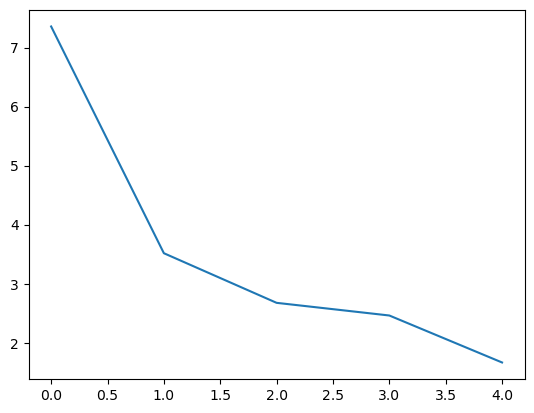

In [222]:
loss_coords = feed_forward_multiclass(x, y, num_iters=5)
x_vals = list(range(0,len(loss_coords)))
plt.plot(x_vals, loss_coords)
plt.show()